<a href="https://www.nvidia.com/dli"> <img src="images/DLI_Header.png" alt="Header" style="width: 400px;"/> </a>

# Computer Vision for Industrial Inspection #

## Part 2 - Model Training with Transfer Learning ##
In this notebook, you will learn how to train a classification model with the TAO Toolkit using pre-trained ResNet50 weights. 

**Table of Contents**
<br>
This notebook covers the below sections: 
1. [Introduction to TAO Toolkit](#s2-1)
    * [Transfer Learning](#s2-1.1)
    * [Vision AI Pre-Trained Models Supported](#s2-1.2)
    * [TAO Toolkit Workflow](#s2-1.3)
    * [TAO Launcher, CLI (Command Line Interface), and Spec Files](#s2-1.4)
    * [Set Up Environment Variables](#s2-1.5)
    * [Exercise #1 - Explore TAO Toolkit CLI](#s2-e1)
2. [Training a Classification Model](#s2-2)
    * [Preparation for Model Training](#s2-2.1)
    * [Download Pre-Trained Model](#s2-2.2)
    * [Prepare Dataset](#s2-2.3)
    * [Model Training](#s2-2.4)
    * [Exercise #2 - Modify Model Config](#s2-e2)
    * [Exercise #3 - Modify Train Config](#s2-e3)
    * [Combine Configuration Files and Initiate Model Training](#s2-2.5)
    * [Model Evaluation](#s2-2.6)
    * [Exercise #4 - Modify Eval Config](#s2-e4)
    * [Combine Configuration Files and Evaluate Model](#s2-2.7)
4. [Model Tuning](#s2-3)
    * [Data Augmentation](#s2-3.1)
    * [Exercise #5 - Retrain Model](#s2-e5)
    * [Model Inference](#s2-3.2)
    * [Precision and Recall](#s2-3.3)
    * [Adjusting the Threshold](#s2-3.4)

<a name='s2-1'></a>
## Introduction to the TAO Toolkit ##
The TAO Toolkit, Train Adapt Optimize, is a framework that simplifies the AI/ML model development workflow. It lets developers fine-tune pre-trained models with custom data to produce highly accurate computer vision models efficiently, eliminating the need for large training runs and deep AI expertise. In addition, it also enables model optimization for inference performance. You can learn more about the TAO Toolkit [here](https://developer.nvidia.com/tao-toolkit) or read the documentation [here](https://docs.nvidia.com/tao/tao-toolkit/index.html#). 
<p><img src="images/tao_toolkit.png" width=720></p>

The TAO Toolkit uses pre-trained models to accelerate the AI development process and reduce costs associated with large scale data collection, labeling, and training models from scratch. Transfer learning with pre-trained models can be used for classification, object detection, and image segmentation tasks. The TAO Toolkit offers useful features such as: 
* Low-coding approach that requires no AI framework expertise, reducing the barrier of entry for anyone who wants to get started building AI-based applications
* Flexible configurations that allow customization to help advance users prototype faster
* Large catalogue of production-ready pre-trained models for common CV tasks that can also be customized with users' own data
* Easy to use interface for model optimization such as pruning and quantization-aware training
* Integration with the Triton Inference Server

_Note: The TAO Toolkit comes with a set of reference scripts and configuration specifications with default parameter values that enable developers to kick-start training and fine-tuning. This lowers the bar and enables users without a deep understanding of models, expertise in deep learning, or beginning coding skills to be able to train new models and fine-tune the pretrained ones._

<a name='s2-1.1'></a>
### Transfer Learning ###
In practice, it is rare and inefficient to initiate the learning task on a network with randomly initialized weights due to factors like data scarcity (inadequate number of training samples) or prolonged training times. One of the most common techniques to overcome this is to use transfer learning. Transfer learning is the process of transferring learned features from one application to another. It is a commonly used training technique where developers use a model trained on one task and re-train to use it on a different task. This works surprisingly well as many of the early layers in a neural network are the same for similar tasks. For example, many of the early layers in a convolutional neural network used for a Computer Vision (CV) model are primarily used to identify outlines, curves, and other features in an image. The network formed by these layers are referred to as the **backbone** of a more complex model. Also known as feature extractors, they take as input the image and extracts the feature map upon which the rest of the network is based. The learned features from these layers can be applied to similar tasks carrying out the same identification in other domains. Transfer learning enables adaptation (fine-tuning) of an existing neural network to a new one, which requires significantly less domain-specific data. In most cases, fine-tuning takes significantly less time (a reduction by x10 factor is common), saving time and resources. As it relates to vision AI, transfer learning can be used for adding new classification by transferring weights from one application to another. 

<p><img src='images/transfer_learning.png' width=720></p>

More information about transfer learning can be found in this [blog](https://blogs.nvidia.com/blog/2019/02/07/what-is-transfer-learning/).

<a name='s2-1.2'></a>
### Vision AI Pre-Trained Models Supported ###
Developers, system builders, and software partners building optical inspection systems can bring their own custom data to train with and fine-tune pre-trained models quickly instead of going through significant effort in large data collection and training from scratch. **General purpose vision models** provide pre-trained weights for popular network architectures to train an image classification model, an object detection model, or a segmentation model. This gives users the flexibility and control to build AI models for any number of applications, from smaller lightweight models for edge deployment to larger models for more complex tasks. They are trained on the [Open Images](https://opensource.google/projects/open-images-dataset) dataset and provide a much better starting point for training versus training from scratch or starting from random weights. 

The TAO Toolkit adapts popular network architectures and backbones to custom data, allowing developers to train, fine tune, prune, and export highly optimized and accurate AI models. When working with TAO, first choose the model architecture to be built, then choose one of the supported backbones. 
<p><img src='images/openimage_table.jpg' width=720></p>

_Note: The pre-trained weights from each feature extraction network merely act as a starting point and may not be used without re-training. In addition, the pre-trained weights are network specific and shouldn't be shared across models that use different architectures._

<a name='s2-1.3'></a>
### TAO Toolkit Workflow ###
Building optical inspection systems is hard. And tailoring even a single component to the needs of the enterprise for deployment is even harder. Deployment for a domain-specific application typically requires several cycles of re-training, fine-tuning, and deploying the model until it satisfies the requirements. As a starting point, model development with the TAO Toolkit typically follows the below steps: 

0. Configuration
1. Download a pre-trained model from NGC
2. Prepare the data for training
3. Train the model using transfer learning
4. Evaluate the model for target predictions
5. Export the model
* Steps to optimize the model for improved inference performance

<p><img src='images/tao_toolkit_workflow.png' width=720></p>

<a name='s2-1.4'></a>
### TAO Launcher, CLI (Command Line Interface), and Spec Files ###
The TAO Toolkit is a low-coding framework that makes it easy to get started. It uses a **launcher** to pull from NGC registry and instantiate the appropriate TAO container that performs the desired subtasks such as convert data, train, evaluate, or export. The TAO launcher is a python package distributed as a python wheel listed in the `nvidia-pyindex` python index, which has been prepared for you already. 

Users interact with the launcher with its **Command Line Interface** that is configured using simple [**Protocol Buffer**](https://developers.google.com/protocol-buffers) **specification files** to include parameters such as the dataset parameters, model parameters, and optimizer and training hyperparameters. More information about the TAO Toolkit Launcher can be found in the [TAO Docs](https://docs.nvidia.com/tao/tao-toolkit/text/tao_launcher.html#tao-launcher). 

The tasks can be invoked from the TAO Toolkit Launcher using the convention `tao <task> <subtask> <args_per_subtask>`, where `<args_per_subtask>` are the arguments required for a given subtask. Once the container is launched, the subtasks are run by the TAO Toolkit containers using the appropriate hardware resources. 
<p><img src='images/tao_launcher.gif' width=960></p>

<p><img src='images/important.png' width=720></p>
Since the TAO Toolkit uses the launcher to pull containers, the first time running a task may take extra time to load. 

<a name='s2-1.5'></a>
### Set Up Environment Variables ###
We set up a couple of environment variables to help us mount the local directories to the TAO container. Specifically, we want to set paths for the `$LOCAL_TRAINING_DATA`, `$LOCAL_SPEC_DIR`, and `$LOCAL_PROJECT_DIR` for the output of the TAO experiment with their respective paths in the TAO container. In doing so, we can make sure that the TAO experiment generated collaterals such as checkpoints, model files (e.g. `.tlt` or `.etlt`), and logs are output to `$LOCAL_PROJECT_DIR/classification`. 

_Note that users will be able to define their own export encryption key when training from a general-purpose model. This is to protect proprietary IP and used to decrypt the `.etlt` model during deployment._

In [1]:
# DO NOT CHANGE THIS CELL
# set environment variables
import os
import pandas as pd
import time
import shutil
import json
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import math

%set_env KEY=my_model_key

%set_env LOCAL_PROJECT_DIR=/dli/task/tao_project
%set_env LOCAL_DATA_DIR=/dli/task/tao_project/data
%set_env LOCAL_SPECS_DIR=/dli/task/tao_project/spec_files
os.environ["LOCAL_EXPERIMENT_DIR"]=os.path.join(os.getenv("LOCAL_PROJECT_DIR"), "classification")

%set_env TAO_PROJECT_DIR=/workspace/tao-experiments
%set_env TAO_DATA_DIR=/workspace/tao-experiments/data
%set_env TAO_SPECS_DIR=/workspace/tao-experiments/spec_files
os.environ['TAO_EXPERIMENT_DIR']=os.path.join(os.getenv("TAO_PROJECT_DIR"), "classification")

# make the data directory
!mkdir -p $LOCAL_DATA_DIR

# unzip
!unzip -qq data/viz_BYD_new.zip -d data

# remove zip file
!rm data/viz_BYD_new.zip

env: KEY=my_model_key
env: LOCAL_PROJECT_DIR=/dli/task/tao_project
env: LOCAL_DATA_DIR=/dli/task/tao_project/data
env: LOCAL_SPECS_DIR=/dli/task/tao_project/spec_files
env: TAO_PROJECT_DIR=/workspace/tao-experiments
env: TAO_DATA_DIR=/workspace/tao-experiments/data
env: TAO_SPECS_DIR=/workspace/tao-experiments/spec_files


The cell below maps the project directory on your local host to a workspace directory in the TAO docker instance, so that the data and the results are mapped from in and out of the docker. This is done by creating a `.tao_mounts.json` file. For more information, please refer to the [launcher instance](https://docs.nvidia.com/tao/tao-toolkit/tao_launcher.html) in the user guide. Setting the `DockerOptions` ensures that you don't have permission issues when writing data into folders created by the TAO docker.

In [2]:
# DO NOT CHANGE THIS CELL
# mapping up the local directories to the TAO docker
mounts_file = os.path.expanduser("~/.tao_mounts.json")

drive_map = {
    "Mounts": [
            # Mapping the project directory
            {
                "source": os.environ["LOCAL_PROJECT_DIR"],
                "destination": "/workspace/tao-experiments"
            },
            # Mapping the specs directory.
            {
                "source": os.environ["LOCAL_SPECS_DIR"],
                "destination": os.environ["TAO_SPECS_DIR"]
            },
            # Mapping the data directory.
            {
                "source": os.environ["LOCAL_DATA_DIR"],
                "destination": os.environ["TAO_DATA_DIR"]
            },
        ],
    "DockerOptions": {
        "user": "{}:{}".format(os.getuid(), os.getgid())
    }
}

# writing the mounts file
with open(mounts_file, "w") as mfile:
    json.dump(drive_map, mfile, indent=4)

To see the usage of different functionality that are supported, use the `-h` or `--help` option. For more information, see the [TAO Toolkit Quick Start Guide](https://docs.nvidia.com/tao/tao-toolkit/text/tao_toolkit_quick_start_guide.html). 
Here is the **sample output**: 

In [3]:
# DO NOT CHANGE THIS CELL
!tao --help

usage: tao [-h]
           {list,stop,info,action_recognition,augment,bpnet,classification,converter,detectnet_v2,dssd,efficientdet,emotionnet,faster_rcnn,fpenet,gazenet,gesturenet,heartratenet,intent_slot_classification,lprnet,mask_rcnn,multitask_classification,n_gram,punctuation_and_capitalization,question_answering,retinanet,spectro_gen,speech_to_text,speech_to_text_citrinet,ssd,text_classification,token_classification,unet,vocoder,yolo_v3,yolo_v4,yolo_v4_tiny}
           ...

Launcher for TAO Toolkit.

optional arguments:
  -h, --help            show this help message and exit

tasks:
  {list,stop,info,action_recognition,augment,bpnet,classification,converter,detectnet_v2,dssd,efficientdet,emotionnet,faster_rcnn,fpenet,gazenet,gesturenet,heartratenet,intent_slot_classification,lprnet,mask_rcnn,multitask_classification,n_gram,punctuation_and_capitalization,question_answering,retinanet,spectro_gen,speech_to_text,speech_to_text_citrinet,ssd,text_classification,token_classification,une

With the TAO Toolkit, users can train models for object detection, classification, segmentation, optical character recognition, facial landmark estimation, gaze estimation, and more. In TAO's terminology, these would be the **tasks**, which support **subtasks** such as `train`, `prune`, `evaluate`, `export`, etc. Each task/subtask requires different combinations of configuration files to accommodate for different parameters, such as the dataset parameters, model parameters, and optimizer and training hyperparameters. Part of what makes TAO Toolkit so easy to use is that most of those parameters are hidden away in the form of experiment specification files (spec files). They are detailed in the [documentation](https://docs.nvidia.com/tao/tao-toolkit/#tao-toolkit) for reference. It's very helpful to have these resources handy when working with the TAO Toolkit. In addition, there are several specific tasks that help with handling the launched commands. 

Below are the tasks available in the TAO Toolkit, organized by their respective computer vision objectives. We grayed out the tasks for Conversational AI as they are out of scope for this course. 

<img src='images/tao_tasks.png' width=740>

<a name='s2-e1'></a>
### Exercise #1 - Explore TAO Toolkit CLI ###
Let's explore some TAO Toolkit tasks. 

**Instructions**:<br>
* Modify the `<FIXME>`s only and execute the cell, choosing a task from options such as: `[classification, detectnet_v2, mask_rcnn, emotionnet, etc.]`, follow by a subtask from options such as: `[calibration_tensorfile, dataset_convert, evaluate, export, inference, prune, train]`. 

In [5]:
# Example: !tao classification train --help
!tao classification train --help

2023-10-27 05:02:36,640 [INFO] root: Registry: ['nvcr.io']
2023-10-27 05:02:36,822 [INFO] tlt.components.instance_handler.local_instance: Running command in container: nvcr.io/nvidia/tao/tao-toolkit-tf:v3.21.11-tf1.15.5-py3
2023-10-27 05:02:36,824 [INFO] tlt.components.docker_handler.docker_handler: The required docker doesn't exist locally/the manifest has changed. Pulling a new docker.
2023-10-27 05:02:36,824 [INFO] tlt.components.docker_handler.docker_handler: Pulling the required container. This may take several minutes if you're doing this for the first time. Please wait here.
...
Pulling from repository: nvcr.io/nvidia/tao/tao-toolkit-tf
2023-10-27 05:05:24,315 [INFO] tlt.components.docker_handler.docker_handler: Container pull complete.
Using TensorFlow backend.
usage: classification train [-h] [--num_processes NUM_PROCESSES] [--gpus GPUS]
                            [--gpu_index GPU_INDEX [GPU_INDEX ...]]
                            [--use_amp] [--log_file LOG_FILE] -e
        

Click ... to show **solution**. 

<p><img src='images/check.png' width=720></p>

Did you get the below error message? This is likely due to a bad NGC configuration. Please check the NGC CLI and Docker Registry section of the [introduction notebook](00_introduction.ipynb).

<a name='s2-2'></a>
## Training a Classification Model ##
[Image Classification](https://catalog.ngc.nvidia.com/orgs/nvidia/teams/tao/models/pretrained_classification) is a popular computer vision technique in which an image is classified into one of the designated classes based on the image features. We want to train a classification model in order to label each image as either `defect` or `notdefect`. With the TAO Toolkit, we can choose the desired ResNet50 backbone as a feature extractor. As such, we will use the `classification` task, which supports the following subtasks: 
* `train`
* `evaluate`
* `inference`
* `prune`
* `export`

<p><img src='images/rewind.png' width=720><p>
    
These subtasks can be invoked using the convention `tao classification <subtask> <args_per_subtask>` on the command-line, where `args_per_subtask` are the arguments required for a given subtask. Additionally, we can always find more information about these subtasks with `tao classification <subtask> -h` or `tao classification <subtask> --help`. 

<a name='s2-2.1'></a>
### Preparation for Model Training ###
For the remaining of the lab, we will use the TAO Toolkit to train a classification model. Below is what the model development workflow looks like. We start by preparing a pre-trained model and the data. Next, we prepare the configuration file(s) and begin to train the model with new data and evaluate its performance. We will export the model once its satisfactory. Note that this notebook does not include inference optimization steps, which is important for optical inspection systems that are deployed on edge devices. 
<p><img src='images/simple_workflow.png' width=720></p>

<a name='s2-2.2'></a>
### Download Pre-Trained Model ###
Developers typically begin by choosing and downloading a pre-trained model from [NGC](https://ngc.nvidia.com/) which contains pre-trained weights of the architecture of their choice. It's difficult to immediately identify which model/architecture will work best for a specific use case as there is often a tradeoff between time to train, accuracy, and inference performance. It is common to compare across multiple models before picking the best candidate.

Here are some pointers that will help choose an appropriate model: 
* Look at the model inputs/outputs to decide if it will fit your use case. 
* Input format is also an important consideration. For example, some models expect the input to be 0-1 normalized with input channels in RGB order. Some models that use a different input order may require input preprocessing/mean subtraction that might result in suboptimal performance. 

We can use the `ngc registry model list <model_glob_string>` command to get a list of models that are hosted on the NGC model registry. For example, we can use `ngc registry model list nvidia/tao/*` to list all available models. The `--column` option identifies the columns of interest. More information about the NGC Registry CLI can be found in the [User Guide](https://docs.nvidia.com/dgx/pdf/ngc-registry-cli-user-guide.pdf). The `ngc registry model download-version <org>/[<team>/]<model-name:version>` command will download the model from the registry. It has a `--dest` option to specify the path to download directory. Alternatively, a catalog of support models can also be found [here](https://catalog.ngc.nvidia.com/orgs/nvidia/teams/tao/collections/tao_computervision). 

In [6]:
# DO NOT CHANGE THIS CELL
# list all available models
!ngc registry model list nvidia/tao/pretrained_classification:*

[{
    "accuracyReached": 77.56,
    "batchSize": 1,
    "createdByUser": "n90fe0en2gvll5957fel7u75sg",
    "createdDate": "2021-08-18T20:15:41.146Z",
    "description": "",
    "gpuModel": "V100",
    "memoryFootprint": "153.7",
    "numberOfEpochs": 80,
    "status": "UPLOAD_COMPLETE",
    "totalFileCount": 1,
    "totalSizeInBytes": 161183816,
    "versionId": "vgg19"
},{
    "accuracyReached": 77.17,
    "batchSize": 1,
    "createdByUser": "n90fe0en2gvll5957fel7u75sg",
    "createdDate": "2021-08-18T20:15:13.258Z",
    "description": "",
    "gpuModel": "V100",
    "memoryFootprint": "113.2",
    "numberOfEpochs": 80,
    "status": "UPLOAD_COMPLETE",
    "totalFileCount": 1,
    "totalSizeInBytes": 118655144,
    "versionId": "vgg16"
},{
    "accuracyReached": 65.13,
    "batchSize": 1,
    "createdByUser": "n90fe0en2gvll5957fel7u75sg",
    "createdDate": "2021-08-18T20:18:00.942Z",
    "description": "",
    "gpuModel": "V100",
    "memoryFootprint": "6.5",
    "numberOfEpochs": 

<p><img src='images/check.png' width=720></p>

Did you get the below error message? This is likely due to a bad NGC CLI configuration. Please check the NGC CLI and Docker Registry section of the [introduction notebook](00_introduction.ipynb).

In [7]:
# DO NOT CHANGE THIS CELL
# create directory to store the pre-trained model
!mkdir -p $LOCAL_EXPERIMENT_DIR/pretrained_resnet50/

# download the pre-trained classification model from NGC
!ngc registry model download-version nvidia/tao/pretrained_classification:resnet50 --dest $LOCAL_EXPERIMENT_DIR/pretrained_resnet50 

{
    "download_end": "2023-10-27 05:06:28.218224",
    "download_start": "2023-10-27 05:06:00.186126",
    "download_time": "28s",
    "files_downloaded": 1,
    "local_path": "/dli/task/tao_project/classification/pretrained_resnet50/pretrained_classification_vresnet50",
    "size_downloaded": "272.54 MB",
    "status": "Completed",
    "transfer_id": "pretrained_classification_vresnet50"
}


<p><img src='images/tip.png' width=720></p>

We designated the model to be downloaded locally to `tao_project/classification/pretrained_resnet50`, which is mapped to `/workspace/tao-experiments/classification/pretrained_resnet50` in the TAO container based on the mapping of `LOCAL_EXPERIMENT_DIR` to `TAO_EXPERIMENT_DIR`. Looking at the `local_path` and `transfer_id` keys of the output JSON, we can gather that the path of the pre-trained model should be in the `tao_project/classification/pretrained_resnet50/pretrained_classification_vresnet50` directory. When referencing paths for the TAO Toolkit, it's important to use paths based on the TAO container. In this case it would be `/workspace/tao-experiments/classification/pretrained_resnet50/pretrained_classification_vresnet50`. 

In [8]:
# DO NOT CHANGE THIS CELL
!ls -al tao_project/classification/pretrained_resnet50/pretrained_classification_vresnet50

total 301272
drwx------ 2 root root      4096 Oct 27 05:06 .
drwxr-xr-x 3 root root      4096 Oct 27 05:06 ..
-rw------- 1 root root 308488496 Oct 27 05:06 resnet_50.hdf5


<a name='s2-2.3'></a>
### Prepare Dataset ###
The TAO Toolkit expects the training data for the `classification` task to be in the format described in the [documentation](https://docs.nvidia.com/tao/tao-toolkit/text/data_annotation_format.html#id8). The `classification` models expect the images to be within the directories of the respective classes. 

_The `test` folder in the above directory structure is optional; any folder can be used for inference._

We start by loading the manifest of images in our dataset. 

In [9]:
# DO NOT CHANGE THIS CELL
# export csv file as dataframe
capacitor_df=pd.read_csv('capacitor_df.csv', converters={'img_shape': pd.eval})
capacitor_df.head()

,true_defect,defect_img_path,date,board,comp_id,img_shape,defect_image_name,comp_type
0,notdefect,/dli/task/data/AOI_DL_data_0908/0423318026324/...,908,423318026324,C1090,"[54, 27, 3]",D0_C1090.jpg,C
1,notdefect,/dli/task/data/AOI_DL_data_0908/0423318026269/...,908,423318026269,C1090,"[54, 27, 3]",D1_C1090.jpg,C
2,notdefect,/dli/task/data/AOI_DL_data_0908/0423318026523/...,908,423318026523,C1090,"[54, 27, 3]",D1_C1090.jpg,C
3,notdefect,/dli/task/data/AOI_DL_data_0908/0423318026331/...,908,423318026331,C1090,"[54, 27, 3]",D1_C1090.jpg,C
4,notdefect,/dli/task/data/AOI_DL_data_0908/0423318026211/...,908,423318026211,C1090,"[53, 27, 3]",D1_C1090.jpg,C


Below we will split the data into `train` set and `validation` set and copy the images into their respective folder. 

In [10]:
# DO NOT CHANGE THIS CELL
# set default as training set
capacitor_df['dataset']='train'

# sample 30% and set as validation set
val_set=capacitor_df.groupby('true_defect', group_keys=False).apply(lambda x: x.sample(frac=0.3))
capacitor_df.loc[val_set.index, 'dataset']='val'
capacitor_df.groupby(['dataset', 'true_defect']).size()

dataset  true_defect
train    defect           69
         notdefect      1263
val      defect           30
         notdefect       541
dtype: int64

In [11]:
# DO NOT CHANGE THIS CELL
# remove existing data from previous experiment (if any)
!rm -rf $LOCAL_DATA_DIR/*

!mkdir -p $LOCAL_DATA_DIR/train/defect
!mkdir -p $LOCAL_DATA_DIR/train/notdefect
!mkdir -p $LOCAL_DATA_DIR/val/defect
!mkdir -p $LOCAL_DATA_DIR/val/notdefect

In [12]:
# DO NOT CHANGE THIS CELL
# time the process
start=time.time()

# iterate through the capacitors
for idx, row in capacitor_df.iterrows(): 
    shutil.copyfile(row['defect_img_path'], f"{os.environ['LOCAL_DATA_DIR']}/{row['dataset']}/{row['true_defect']}/{row['date']}_{row['board']}_{row['defect_image_name']}")

print('It took {} seconds to copy {} images.'.format(round(time.time()-start, 2), len(capacitor_df)))

It took 1.39 seconds to copy 1903 images.


Let's take a quick look at the size of the images. 

The median dimension is 56.0 x 27.0.


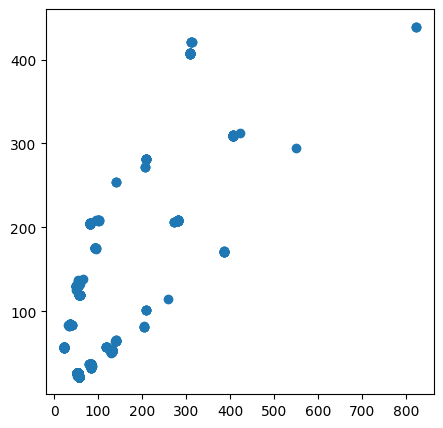

In [13]:
# DO NOT CHANGE THIS CELL
# plot image dimensions
plt.figure(figsize=(5, 5))
plt.scatter(capacitor_df['img_shape'].str[0], 
            capacitor_df['img_shape'].str[1])

print('The median dimension is {} x {}.'.format(np.median(capacitor_df['img_shape'].str[0]), np.median(capacitor_df['img_shape'].str[1])))

The images range in size and dimension. However, the TAO Toolkit will resize the images in the dataset to a specific shape when fed to the model for training. 

<a name='s2-2.4'></a>
### Model Training ###
Training configuration is done through an experiment spec file, which includes options such as which dataset to use for training, which dataset to use for validation, which pre-trained model architecture to use, which hyperparameters to tune, and other training options. The `train`, `evaluate`, `prune`, and `inference` subtasks for a `classification` experiment share the same configuration file. Configuration files can be created from scratch or modified using the templates provided in TAO Toolkit's [sample applications](https://docs.nvidia.com/tao/tao-toolkit/#cv-applications). 

The training configuration file has three sections: 
* `model_config` (required for training)
* `eval_config` (not required for training)
* `training_config` (required for training)

<p><img src='images/important.png' width=720></p>

We will create the configuration files using templates. Specifically, we have broken the configuration files into separate parts for ease of discussion, which we will combine at the end for the TAO Toolkit to consume. 

Execute the below cells to preview the combined training/evaluation configuration file that will be used. It is currently not usable as we have made some intentional modifications that will require correction. Furthermore, the `eval_config` portion of the combined configuration file is not used for training, so leaving it unmodified will not adversely impact the training process. 

In [14]:
# DO NOT CHANGE THIS CELL
# combining configuration components in separate files and writing into one
!cat $LOCAL_SPECS_DIR/resnet50/model_config.txt \
     $LOCAL_SPECS_DIR/resnet50/train_config.txt \
     $LOCAL_SPECS_DIR/resnet50/eval_config.txt \
     > $LOCAL_SPECS_DIR/resnet50/combined_config.txt
!cat $LOCAL_SPECS_DIR/resnet50/combined_config.txt

model_config {
  arch: "<<<<FIXME>>>>"
  n_layers: <<<<FIXME>>>>
  use_batch_norm: True
  freeze_blocks: 0
  input_image_size: "3,224,224"
}
##################################################
train_config {
  train_dataset_path: "/workspace/tao-experiments/data/<<<<FIXME>>>>"
  val_dataset_path: "/workspace/tao-experiments/data/<<<<FIXME>>>>"
  pretrained_model_path: "/workspace/tao-experiments/classification/<<<<FIXME>>>>"
  optimizer {
    sgd {
    lr: 0.01
    decay: 0.0
    momentum: 0.9
    nesterov: False
    }
  }
  n_epochs: <<<<FIXME>>>>
  batch_size_per_gpu: 32
  n_workers: 8
  enable_random_crop: False
  enable_center_crop: False
  enable_color_augmentation: False
  preprocess_mode: "caffe"
  reg_config {
    type: "L2"
    scope: "Conv2D, Dense"
    weight_decay: 0.00005
  }
  lr_config {
    step {
      learning_rate: 0.006
      step_size: 10
      gamma: 0.1
    }
  }
}
##################################################
eval_config {
  eval_dataset_path: "/workspace/ta

<p><img src='images/important.png' width=720></p>

Note that we must leave an empty new line at the end of each text file to ensure the `combined_config.txt` is created properly. 

<a name='s2-e2'></a>
### Exercise #2 - Modify Model Config ###
The classification model can be configured using the `model_config` option in the spec file. 
* `arch (str)`: This defines the architecture of the back bone feature extractor to be used to train.
* `n_layers (int)`: Depth of the feature extractor for scalable templates. 
* `use_batch_norm (bool)`: Boolean variable to use batch normalization layers or not. 
* `freeze_blocks (float repeated)`: This parameter defines which blocks may be frozen from the instantiated feature extractor template, and is different for different feature extractor templates.
* `input_image_size (str)`: The dimension of the input layer of the model. Images in the dataset will be resized to this shape by the dataloader when fed to the model for training. 

**Instructions**:<br>
* Modify the `model_config`[(here)](tao_project/spec_files/resnet50/model_config.txt) section of the training configuration file by changing the `<FIXME>`s into acceptable values and **save changes**. 
    * For this lab, we will use _ResNet50_ as the architecture for the classification model. [Residual neural network](https://en.wikipedia.org/wiki/Residual_neural_network), or **ResNet**, is a type of convolutional neural network used as a backbone for many computer vision tasks. The `50` refers to the number of layers in this architecture. It should be noted that typically the deeper (i.e. more layers) a neural network is, the more time consuming it is to compute. 

Click ... to show **solution**. 

In [15]:
# DO NOT CHANGE THIS CELL
# read the config file
!cat $LOCAL_SPECS_DIR/resnet50/model_config.txt

model_config {
  arch: "resnet"
  n_layers: 50
  use_batch_norm: True
  freeze_blocks: 0
  input_image_size: "3,224,224"
}
##################################################


<a name='s2-e3'></a>
### Exercise #3 - Modify Train Config ###
The `training_config` describes the training and learning process. 
* `train_dataset_path (str)`: UNIX format path to the root directory of the training dataset.
* `val_dataset_path (str)`: UNIX format path to the root directory of the validation dataset.
* `pretrained_model_path (str)`: UNIX format path to the model file containing the pretrained weights to initialize the model from.
    * Based on how NGC names the model downloaded, we should use `/workspace/tao-experiments/classification/pretrained_resnet50/pretrained_classification_vresnet50/resnet_50.hdf5` to reference the pre-trained model. 
* `optimizer (dict)`: This parameter defines which optimizer to use for training. Can be chosen from `sgd`, `adam`, or `rmsprop`.
    * `sgd (dict)`
        * `lr (float)`
        * `decay (float)`
        * `momentum (float)`
        * `nesterov (bool)`
* `batch_size_per_gpu (int)`: This parameter defines the number of images per batch per gpu.
* `n_workers (int)`: Number of workers fetching batches of images in the training/validation dataloader.
* `n_epochs (int)`: This parameter defines the total number of epochs to run the experiment.
* `enable_random_crop (bool)`: A flag to enable random crop during training.
* `enable_center_crop (bool)`: A flag to enable center crop during validation.
* `enable_color_augmentation (bool)`:  A flag to enable color augmentation during training.
* `preprocess_mode (str)`: Mode for input image preprocessing. Defaults to `caffe`.
* `reg_config (dict)`: The parameters for regularizers.
    * `type (str)`: Regularizer type can be `L1`, `L2` or `None`.
    * `scope (str)`: Scope can be either `Conv2D` or `Dense` or both.
    * `weight_decay (float)`: 0 < weight decay < 1. 
* `lr_config (dict)`: The parameters for learning rate scheduler.
    * `step (dict)`: Defines the step learning rate scheduler. 
      * `learning_rate (float)`: The base (maximum) learning rate value.
      * `step_size (int)`: The progress (percentage of the entire training duration) after which the learning rate will be decreased.
      * `gamma (float)`: The multiplicative factor used to decrease the learning rate.

**Instructions**:<br>
* Modify the `train_config`[(here)](tao_project/spec_files/resnet50/train_config.txt) section of the configuration file by changing the `<FIXME>`s into acceptable values and **save changes**. Typically, using a higher epochs count will improve model performance but takes longer time to complete. For the purpose of this exercise, we recommend starting with a low `n_epochs`, such as `25`, to allow the model to converge without taking too much time. 

Click ... to show **solution**. 

In [16]:
# DO NOT CHANGE THIS CELL
# read the config file
!cat $LOCAL_SPECS_DIR/resnet50/train_config.txt

train_config {
  train_dataset_path: "/workspace/tao-experiments/data/train"
  val_dataset_path: "/workspace/tao-experiments/data/val"
  pretrained_model_path: "/workspace/tao-experiments/classification/pretrained_resnet50/pretrained_classification_vresnet50/resnet_50.hdf5"
  optimizer {
    sgd {
    lr: 0.01
    decay: 0.0
    momentum: 0.9
    nesterov: False
    }
  }
  n_epochs: 25
  batch_size_per_gpu: 32
  n_workers: 8
  enable_random_crop: False
  enable_center_crop: False
  enable_color_augmentation: False
  preprocess_mode: "caffe"
  reg_config {
    type: "L2"
    scope: "Conv2D, Dense"
    weight_decay: 0.00005
  }
  lr_config {
    step {
      learning_rate: 0.006
      step_size: 10
      gamma: 0.1
    }
  }
}
##################################################


<a name='s2-2.5'></a>
### Combine Configuration Files and Initiate Model Training ###

In [17]:
# DO NOT CHANGE THIS CELL
# combining configuration components in separate files and writing into one
!cat $LOCAL_SPECS_DIR/resnet50/model_config.txt \
     $LOCAL_SPECS_DIR/resnet50/train_config.txt \
     $LOCAL_SPECS_DIR/resnet50/eval_config.txt \
     > $LOCAL_SPECS_DIR/resnet50/combined_config.txt
!cat $LOCAL_SPECS_DIR/resnet50/combined_config.txt

model_config {
  arch: "resnet"
  n_layers: 50
  use_batch_norm: True
  freeze_blocks: 0
  input_image_size: "3,224,224"
}
##################################################
train_config {
  train_dataset_path: "/workspace/tao-experiments/data/train"
  val_dataset_path: "/workspace/tao-experiments/data/val"
  pretrained_model_path: "/workspace/tao-experiments/classification/pretrained_resnet50/pretrained_classification_vresnet50/resnet_50.hdf5"
  optimizer {
    sgd {
    lr: 0.01
    decay: 0.0
    momentum: 0.9
    nesterov: False
    }
  }
  n_epochs: 25
  batch_size_per_gpu: 32
  n_workers: 8
  enable_random_crop: False
  enable_center_crop: False
  enable_color_augmentation: False
  preprocess_mode: "caffe"
  reg_config {
    type: "L2"
    scope: "Conv2D, Dense"
    weight_decay: 0.00005
  }
  lr_config {
    step {
      learning_rate: 0.006
      step_size: 10
      gamma: 0.1
    }
  }
}
##################################################
eval_config {
  eval_dataset_path: "/wo

After preparing the input data and setting up the spec file(s), we can start training the classification model.

When using the `train` subtask, the `-e` argument indicates the path to the spec file, the `-r` argument indicates the result directory, and the `-k` indicates the key to _load_ the pre-trained weights. 

_Multi-GPU support can be enabled for those with the hardware using the `--gpus` argument. When running the training with more than one GPU, we will need to modify the `batch_size` and `learning_rate`. In most cases, scaling down the batch-size by a factor of NUM_GPU's or scaling up the learning rate by a factor of NUM_GPUs would be a good place to start._

In [18]:
# DO NOT CHANGE THIS CELL
# remove any previous training if exists
!rm -rf $LOCAL_EXPERIMENT_DIR/resnet50

<p><img src='images/important.png' width=720></p>

While the TAO Toolkit is running, there may be some _TensorFlow deprecation_ warning messages that can be ignored. 

In [19]:
# DO NOT CHANGE THIS CELL
# train model
!tao classification train -e $TAO_SPECS_DIR/resnet50/combined_config.txt \
                          -r $TAO_EXPERIMENT_DIR/resnet50 \
                          -k $KEY

2023-10-27 05:10:41,487 [INFO] root: Registry: ['nvcr.io']
2023-10-27 05:10:41,660 [INFO] tlt.components.instance_handler.local_instance: Running command in container: nvcr.io/nvidia/tao/tao-toolkit-tf:v3.21.11-tf1.15.5-py3
Using TensorFlow backend.
Using TensorFlow backend.
2023-10-27 05:10:49,308 [INFO] __main__: Loading experiment spec at /workspace/tao-experiments/spec_files/resnet50/combined_config.txt.

2023-10-27 05:10:49,312 [WARNING] tensorflow: From /root/.cache/bazel/_bazel_root/ed34e6d125608f91724fda23656f1726/execroot/ai_infra/bazel-out/k8-fastbuild/bin/magnet/packages/iva/build_wheel.runfiles/ai_infra/iva/makenet/scripts/train.py:281: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.


2023-10-27 05:10:49,312 [WARNING] tensorflow: From /root/.cache/bazel/_bazel_root/ed34e6d125608f91724fda23656f1726/execroot/ai_infra/bazel-out/k8-fastbuild/bin/magnet/packages/iva/build_wheel.runfiles/ai_infra/iva/makenet/scripts/train.py:290: The name tf.S

**Note**: The training may take some time to complete. For this dataset, each epoch takes ~20 seconds using 32 as `batch_size`. If the training process is taking too long due to a high `n_epochs`, you can interrupt the kernel to stop the training prematurely and start over with a lower `n_epochs`. The last training step (epoch) of the model is saved in the `/workspace/tao-experiments/classification/resnet50/weights` directory, which is used for evaluation, inference, and export. 

<a name='s2-2.6'></a>
### Model Evaluation ###
The model should be evaluated for its performance at the end of training. For classification, this is typically characterized as the accuracy performance. Sometimes we need more insight into accuracy using metrics such as **precision**, **recall**, and **f1-score** for every class. To achieve this, the TAO Toolkit first produces a [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix). 

<a name='s2-e4'></a>
#### Exercise #4 - Modify Eval Config ####
The `eval_config` describes the configurable parameters for evaluating a classification model. 
* `eval_dataset_path (str)`: UNIX format path to the root directory of the evaluation dataset. This can be the train, validation, or test dataset, depending on the usage. Normally, a separate test set would be used for this purpose to be independent from the training process. However, given the limited data size, we will evaluate our model based on the _validation_ dataset. 
* `model_path (str)`: UNIX format path to the root directory of the model file you would like to evaluate.
    * We can choose where to store the trained model - in this case we used `/workspace/tao-experiments/classification/resnet50` inside of the TAO container, which is mapped to `tao_project/classification/resnet50` in our local drive. Furthermore, the trained model name will follow the format `<model_arch>_0<epoch_count>.tlt`, unless specified otherwise. Therefore we should use `/workspace/tao-experiments/classification/resnet50/weights/resnet_025.tlt` if `n_epochs` is set to `25`. 
* `top_k (int)`: The number of elements to look at when calculating the top-K classification categorical accuracy metric.
* `batch_size (int)`: Number of images per batch when evaluating the model.
* `n_workers (int)`: Number of workers fetching batches of images in the evaluation dataloader.
* `enable_center_crop (bool)`: Enable center crop for input images or not. Usually this parameter is set to `True` to achieve better accuracy.

**Instructions**:<br>
* Execute the below cell to view the model trained and familiarize with how it should be referenced. 
* Modify the `eval_config`[(here)](tao_project/spec_files/resnet50/eval_config.txt) section of the training configuration file by changing the `<FIXME>` into acceptable values and **save changes**. 

In [20]:
# DO NOT CHANGE THIS CELL
print('Model for every epoch:')
print('---------------------')
!ls -ltrh $LOCAL_EXPERIMENT_DIR/resnet50/weights

Model for every epoch:
---------------------
total 4.4G
-rw-r--r-- 1 root root 181M Oct 27 05:13 resnet_001.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:13 resnet_002.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:14 resnet_003.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:14 resnet_004.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:15 resnet_005.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:15 resnet_006.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:15 resnet_007.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:16 resnet_008.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:16 resnet_009.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:16 resnet_010.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:17 resnet_011.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:17 resnet_012.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:18 resnet_013.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:18 resnet_014.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:18 resnet_015.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:19 resnet_016.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:19 resnet_

Click ... to show **solution**. 

In [22]:
# DO NOT CHANGE THIS CELL
# read the config file
!cat $LOCAL_SPECS_DIR/resnet50/eval_config.txt

eval_config {
  eval_dataset_path: "/workspace/tao-experiments/data/val"
  model_path: "/workspace/tao-experiments/classification/resnet50/weights/resnet_025.tlt"
  top_k: 1
  batch_size: 32
  n_workers: 8
  enable_center_crop: False
}
##################################################


<a name='s2-2.7'></a>
### Combine Configuration Files and Evaluate Model ###

In [23]:
# DO NOT CHANGE THIS CELL
# combining configuration components in separate files and writing into one
!cat $LOCAL_SPECS_DIR/resnet50/model_config.txt \
     $LOCAL_SPECS_DIR/resnet50/train_config.txt \
     $LOCAL_SPECS_DIR/resnet50/eval_config.txt \
     > $LOCAL_SPECS_DIR/resnet50/combined_config.txt
!cat $LOCAL_SPECS_DIR/resnet50/combined_config.txt

model_config {
  arch: "resnet"
  n_layers: 50
  use_batch_norm: True
  freeze_blocks: 0
  input_image_size: "3,224,224"
}
##################################################
train_config {
  train_dataset_path: "/workspace/tao-experiments/data/train"
  val_dataset_path: "/workspace/tao-experiments/data/val"
  pretrained_model_path: "/workspace/tao-experiments/classification/pretrained_resnet50/pretrained_classification_vresnet50/resnet_50.hdf5"
  optimizer {
    sgd {
    lr: 0.01
    decay: 0.0
    momentum: 0.9
    nesterov: False
    }
  }
  n_epochs: 25
  batch_size_per_gpu: 32
  n_workers: 8
  enable_random_crop: False
  enable_center_crop: False
  enable_color_augmentation: False
  preprocess_mode: "caffe"
  reg_config {
    type: "L2"
    scope: "Conv2D, Dense"
    weight_decay: 0.00005
  }
  lr_config {
    step {
      learning_rate: 0.006
      step_size: 10
      gamma: 0.1
    }
  }
}
##################################################
eval_config {
  eval_dataset_path: "/wo

We can evaluate the model with the `evaluate` subtask. 

The `evaluate` subtask runs evaluation on the same validation set that was used during training. We can also run evaluation on an earlier model by editing the spec file to point to the intended model. When using the `evaluate` subtask, the `-e` argument indicates the path to the spec file and the `-k` argument indicates the key to _load_ the model. 

In [24]:
# DO NOT CHANGE THIS CELL
# evaluate the model using the same validation set as training
!tao classification evaluate -e $TAO_SPECS_DIR/resnet50/combined_config.txt\
                             -k $KEY

2023-10-27 05:29:09,381 [INFO] root: Registry: ['nvcr.io']
2023-10-27 05:29:09,553 [INFO] tlt.components.instance_handler.local_instance: Running command in container: nvcr.io/nvidia/tao/tao-toolkit-tf:v3.21.11-tf1.15.5-py3
Using TensorFlow backend.
Using TensorFlow backend.

2023-10-27 05:29:17,807 [WARNING] tensorflow: From /root/.cache/bazel/_bazel_root/ed34e6d125608f91724fda23656f1726/execroot/ai_infra/bazel-out/k8-fastbuild/bin/magnet/packages/iva/build_wheel.runfiles/ai_infra/iva/makenet/scripts/evaluate.py:28: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.


2023-10-27 05:29:17,807 [WARNING] tensorflow: From /root/.cache/bazel/_bazel_root/ed34e6d125608f91724fda23656f1726/execroot/ai_infra/bazel-out/k8-fastbuild/bin/magnet/packages/iva/build_wheel.runfiles/ai_infra/iva/makenet/scripts/evaluate.py:30: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.


2023-10-27 05:29:18,305 [WARNING] tensorflow: From /root/.cache/baz

<p><img src='images/important.png' width=720></p>

The model that we've trained may not do very well with predicting `defect` yet. For this dataset, we have tested that allowing the model to train for at least **25 epochs** is a good starting point. In the following section, we're going to fine-tune the model to improve it's performance. 

<a name='s2-3'></a>
## Model Tuning ##

<a name='s2-3.1'></a>
### Data Augmentation ###
Deep learning models require training with vast amounts of data to achieve accurate results. DALI can not only read images from disk and batch them into tensors, it can also perform various augmentations on those images to improve deep learning training results. [Data augmentation](https://en.wikipedia.org/wiki/Data_augmentation) artificially increases the size of a dataset by introducing random disturbances to the data, such as _geometric deformations_, _color transforms_, _noise addition_, and so on. These disturbances help produce models that are more robust in their predictions, avoid overfitting, and deliver better accuracy. We will use DALI to demonstrate data augmentation that we will introduce for model training, such as _cropping_, _resizing_, and _flipping_. 

In [25]:
# DO NOT CHANGE THIS CELL
# import dependencies
from nvidia.dali.pipeline import Pipeline
from nvidia.dali import pipeline_def
import nvidia.dali.fn as fn
from PIL import Image
import warnings

warnings.filterwarnings("ignore")

In [26]:
# DO NOT CHANGE THIS CELL
batch_size=8
defect_label_map={'notdefect': 1, 'defect': 0}
defect_inverse_map={v: k for k, v in defect_label_map.items()}
defect_train_df=capacitor_df[(capacitor_df['true_defect']=='defect') & (capacitor_df['dataset']=='train')]
n_iter=10

@pipeline_def
def augmentation_pipeline():
    # use fn.readers.file to read encoded images and labels from the hard drive
    jpgs, labels=fn.readers.file(files=defect_train_df['defect_img_path'].to_list(), labels=defect_train_df['true_defect'].map(defect_label_map).to_list())
    # use the fn.decoders.image operation to decode images from JPG to RGB
    images=fn.decoders.image(jpgs, device='cpu')
    # use the fn.rotate operation to rotate image
    rotated_images = fn.rotate(images.gpu(), angle=90, fill_value=0)
    return rotated_images, labels

In [27]:
# DO NOT CHANGE THIS CELL
# define a function display images
def save_images(image_batch, label_batch, batch_count):
    for idx in range(batch_size): 
        image_ary=np.array(image_batch[idx])
        im=Image.fromarray(image_ary)
        im.save(os.path.join(os.environ['LOCAL_DATA_DIR'], 'train', defect_inverse_map[np.array(labels[idx])[0]], 'augmented_'+str(batch_count)+'_'+str(idx))+'.jpg')

In [28]:
# DO NOT CHANGE THIS CELL
# build pipeline
augmentation_pipe=augmentation_pipeline(batch_size=batch_size, num_threads=4, device_id=0)
augmentation_pipe.build()

In [29]:
# DO NOT CHANGE THIS CELL
# time the process
start=time.time()

# iterate and create some augmented data
for iter in range(n_iter): 
    augmentation_pipe_output=augmentation_pipe.run()
    augmented_images, labels=augmentation_pipe_output
    save_images(augmented_images.as_cpu(), labels, iter)

print('It took {} seconds to create {} images.'.format(round(time.time()-start, 2), len(defect_train_df)))

It took 1.37 seconds to create 69 images.


<p><img src='images/important.png' width=720></p>

DALI does not support moving the data from the GPU to the CPU within the pipeline. That is why a CPU operation cannot follow a GPU one. Since `augmentation_pipe_output` contains 2 TensorLists, but this time the first output, result of the `rotate` operation, is on the GPU. We cannot access contents of `TensorListGPU` directly from the CPU, so in order to show the results we need to copy it to the CPU by using `as_cpu` method.

<a name='s2-e5'></a>
### Exercise #5 - Retrain Model ###
We will use the same configuration file to train a new model with the augmented dataset. 

**instructions**:<br>
* Execute the below cell to train another model using the augmented dataset. Note the output directory is different than the model previously trained as `resnet50_aug`. 
* Execute the cell below to view the model trained and familiarize with how it should be referenced. 
* Modify the `eval_config`[(here)](tao_project/spec_files/resnet50/eval_config.txt) section of the training configuration file by changing the `model_path` to reference the newly trained model and **save changes**. 
* Execute the cell below to create a new configuration file. 
* Execute the cell below to evaluate the new model using the same validation set as before. 

In [35]:
# DO NOT CHANGE THIS CELL
# train model
!tao classification train -e $TAO_SPECS_DIR/resnet50/combined_config.txt \
                          -r $TAO_EXPERIMENT_DIR/resnet50_aug \
                          -k $KEY

2023-10-27 05:47:42,929 [INFO] root: Registry: ['nvcr.io']
2023-10-27 05:47:43,123 [INFO] tlt.components.instance_handler.local_instance: Running command in container: nvcr.io/nvidia/tao/tao-toolkit-tf:v3.21.11-tf1.15.5-py3
^C
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py", line 1429, in <module>
    fontManager = json_load(_fmcache)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py", line 1012, in json_load
    with open(filename, 'r') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/matplotlib/fontlist-v330.json'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/classification", line 5, in <module>
    from iva.makenet.entrypoint.makenet import main
  File "/root/.cache/bazel/_bazel_root/ed34e6d125608f91724fda23656f1726/execroot/ai_infra/bazel-out/k8-fastbuild/bin/magnet/packages/iva/build_whee

In [36]:
# DO NOT CHANGE THIS CELL
print('Model for every epoch:')
print('---------------------')
!ls -ltrh $LOCAL_EXPERIMENT_DIR/resnet50_aug/weights

Model for every epoch:
---------------------
total 4.4G
-rw-r--r-- 1 root root 181M Oct 27 05:35 resnet_001.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:36 resnet_002.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:36 resnet_003.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:36 resnet_004.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:37 resnet_005.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:38 resnet_006.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:38 resnet_007.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:38 resnet_008.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:39 resnet_009.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:39 resnet_010.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:40 resnet_011.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:40 resnet_012.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:40 resnet_013.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:41 resnet_014.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:41 resnet_015.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:42 resnet_016.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:42 resnet_

In [37]:
# DO NOT CHANGE THIS CELL
# read the config file
!cat $LOCAL_SPECS_DIR/resnet50/eval_config.txt

eval_config {
  eval_dataset_path: "/workspace/tao-experiments/data/val"
  model_path: "/workspace/tao-experiments/classification/resnet50_aug/weights/resnet_025.tlt"
  top_k: 1
  batch_size: 32
  n_workers: 8
  enable_center_crop: False
}
##################################################


In [38]:
# DO NOT CHANGE THIS CELL
# combining configuration components in separate files and writing into one
!cat $LOCAL_SPECS_DIR/resnet50/model_config.txt \
     $LOCAL_SPECS_DIR/resnet50/train_config.txt \
     $LOCAL_SPECS_DIR/resnet50/eval_config.txt \
     > $LOCAL_SPECS_DIR/resnet50/combined_config_aug.txt
!cat $LOCAL_SPECS_DIR/resnet50/combined_config_aug.txt

model_config {
  arch: "resnet"
  n_layers: 50
  use_batch_norm: True
  freeze_blocks: 0
  input_image_size: "3,224,224"
}
##################################################
train_config {
  train_dataset_path: "/workspace/tao-experiments/data/train"
  val_dataset_path: "/workspace/tao-experiments/data/val"
  pretrained_model_path: "/workspace/tao-experiments/classification/pretrained_resnet50/pretrained_classification_vresnet50/resnet_50.hdf5"
  optimizer {
    sgd {
    lr: 0.01
    decay: 0.0
    momentum: 0.9
    nesterov: False
    }
  }
  n_epochs: 25
  batch_size_per_gpu: 32
  n_workers: 8
  enable_random_crop: False
  enable_center_crop: False
  enable_color_augmentation: False
  preprocess_mode: "caffe"
  reg_config {
    type: "L2"
    scope: "Conv2D, Dense"
    weight_decay: 0.00005
  }
  lr_config {
    step {
      learning_rate: 0.006
      step_size: 10
      gamma: 0.1
    }
  }
}
##################################################
eval_config {
  eval_dataset_path: "/wo

In [39]:
# DO NOT CHANGE THIS CELL
# evaluate the model using the same validation set as training
!tao classification evaluate -e $TAO_SPECS_DIR/resnet50/combined_config_aug.txt\
                             -k $KEY

2023-10-27 05:48:02,870 [INFO] root: Registry: ['nvcr.io']
2023-10-27 05:48:03,081 [INFO] tlt.components.instance_handler.local_instance: Running command in container: nvcr.io/nvidia/tao/tao-toolkit-tf:v3.21.11-tf1.15.5-py3
Using TensorFlow backend.
Using TensorFlow backend.

2023-10-27 05:48:10,665 [WARNING] tensorflow: From /root/.cache/bazel/_bazel_root/ed34e6d125608f91724fda23656f1726/execroot/ai_infra/bazel-out/k8-fastbuild/bin/magnet/packages/iva/build_wheel.runfiles/ai_infra/iva/makenet/scripts/evaluate.py:28: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.


2023-10-27 05:48:10,665 [WARNING] tensorflow: From /root/.cache/bazel/_bazel_root/ed34e6d125608f91724fda23656f1726/execroot/ai_infra/bazel-out/k8-fastbuild/bin/magnet/packages/iva/build_wheel.runfiles/ai_infra/iva/makenet/scripts/evaluate.py:30: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.


2023-10-27 05:48:11,170 [WARNING] tensorflow: From /root/.cache/baz

Click ... to show **solution**. 

<a name='s2-3.2'></a>
### Model Inference ###
The `inference` subtask for `classification` may be used to generate inference results on a directory of images. 

We will perform inference on non-defective images in `/workspace/tao-experiments/data/val/notdefect` as well as defective images in `/workspace/tao-experiments/data/val/defect`. When using the `inference` subtask, the `-e` argument indicates the path to the inference spec file, the `-m` argument indicates the path to the model file, the `-d` argument indicates the path to the images directory, the `-cm` argument indicates _json_ file that specifies the class index and label mapping, and the `-k` argument indicates the key to _load_ the model. 

<a name='s2-e5'></a>
### Exercise #6 - Model Inference ###

**instructions**:<br>
* Execute the below cell to view the model trained and familiarize with how it should be referenced. 
* Modify the `<FIXME>` only to reference the classification model and execute the cell below to perform model inference on non-defective images. 
* Modify the `<FIXME>` only to reference the classification model and execute the cell below to perform model inference on defective images. 

In [40]:
# DO NOT CHANGE THIS CELL
print('Model for every epoch:')
print('---------------------')
!ls -ltrh $LOCAL_EXPERIMENT_DIR/resnet50_aug/weights

Model for every epoch:
---------------------
total 4.4G
-rw-r--r-- 1 root root 181M Oct 27 05:35 resnet_001.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:36 resnet_002.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:36 resnet_003.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:36 resnet_004.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:37 resnet_005.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:38 resnet_006.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:38 resnet_007.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:38 resnet_008.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:39 resnet_009.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:39 resnet_010.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:40 resnet_011.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:40 resnet_012.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:40 resnet_013.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:41 resnet_014.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:41 resnet_015.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:42 resnet_016.tlt
-rw-r--r-- 1 root root 181M Oct 27 05:42 resnet_

In [43]:
!tao classification inference -m $TAO_EXPERIMENT_DIR/resnet50_aug/weights/resnet_025.tlt \
                              -d $TAO_DATA_DIR/val/notdefect \
                              -e $TAO_SPECS_DIR/resnet50/combined_config_aug.txt \
                              -cm $TAO_EXPERIMENT_DIR/resnet50/classmap.json \
                              -k $KEY

2023-10-27 05:49:23,155 [INFO] root: Registry: ['nvcr.io']
2023-10-27 05:49:23,344 [INFO] tlt.components.instance_handler.local_instance: Running command in container: nvcr.io/nvidia/tao/tao-toolkit-tf:v3.21.11-tf1.15.5-py3
Using TensorFlow backend.
Using TensorFlow backend.

2023-10-27 05:49:32,226 [WARNING] tensorflow: From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.


2023-10-27 05:49:32,243 [WARNING] tensorflow: From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.


2023-10-27 05:49:32,254 [WARNING] tensorflow: From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.


2023-10-27 05:49:32,263 [WARNING] tensorflow: From /usr/local/l

In [44]:
!tao classification inference -m $TAO_EXPERIMENT_DIR/resnet50_aug/weights/resnet_025.tlt \
                              -d $TAO_DATA_DIR/val/defect \
                              -e $TAO_SPECS_DIR/resnet50/combined_config_aug.txt \
                              -cm $TAO_EXPERIMENT_DIR/resnet50/classmap.json \
                              -k $KEY

2023-10-27 05:50:12,279 [INFO] root: Registry: ['nvcr.io']
2023-10-27 05:50:12,455 [INFO] tlt.components.instance_handler.local_instance: Running command in container: nvcr.io/nvidia/tao/tao-toolkit-tf:v3.21.11-tf1.15.5-py3
Using TensorFlow backend.
Using TensorFlow backend.

2023-10-27 05:50:21,410 [WARNING] tensorflow: From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.


2023-10-27 05:50:21,428 [WARNING] tensorflow: From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.


2023-10-27 05:50:21,439 [WARNING] tensorflow: From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.


2023-10-27 05:50:21,447 [WARNING] tensorflow: From /usr/local/l

Click ... to show **solution**. 

When executing with `-d`, or directory mode, a `result.csv` file is created and stored in the directory you specify using `-d`. The `result.csv` has the file path in the first column and predicted labels in the second. 

<a name='s2-3.3'></a>
### Precision and Recall ###
We can set a threshold on the probability score and classify only images above this threshold as true defects. In order to accomplish this, we'll have to understand two measures: `recall` and `precision`. The first measure is focused on identifying positive cases and is called __recall__. We define recall as the ability of the model to identify all true positive samples of the dataset. In mathematical terms, recall is the ratio of true positives over true positives plus false negatives. By other means, recall tells us, among all the test samples belonging to the output class, how many of them are identified correctly by the model. The next measure, is called __precision__ and is the ability of the model to identify the relevant samples only, and is defined as the ratio of true positives over true positives plus false positives. Selecting a proper threshold, usually stems from a good balance between the precision and recall values. A well-known measure that provides such a balance is __f1-score__, which is a harmonic mean of precision and recall. 
<p><img src='images/precision_recall.png' width=720></p>

In [45]:
# DO NOT CHANGE THIS CELL
# read the results csv files
notdefect_df=pd.read_csv(os.path.join(os.environ['LOCAL_DATA_DIR'], 'val/notdefect/result.csv'), names=['image_path', 'prediction', 'probability'])
notdefect_df['true_defect']='notdefect'
defect_df=pd.read_csv(os.path.join(os.environ['LOCAL_DATA_DIR'], 'val/defect/result.csv'), names=['image_path', 'prediction', 'probability'])
defect_df['true_defect']='defect'
results_df=pd.concat([notdefect_df, defect_df])

# preview the results dataframe
results_df.head()

,image_path,prediction,probability,true_defect
0,/workspace/tao-experiments/data/val/notdefect/...,notdefect,0.839640,notdefect
1,/workspace/tao-experiments/data/val/notdefect/...,notdefect,0.910328,notdefect
2,/workspace/tao-experiments/data/val/notdefect/...,notdefect,0.992186,notdefect
3,/workspace/tao-experiments/data/val/notdefect/...,notdefect,0.997074,notdefect
4,/workspace/tao-experiments/data/val/notdefect/...,notdefect,0.874640,notdefect


In [46]:
# DO NOT CHANGE THIS CELL
# create confusion matrix
confusion_df=pd.crosstab(results_df['true_defect'], results_df['prediction'])

# preview the confusion matrix dataframe
confusion_df.head()

prediction,defect,notdefect
true_defect,,
defect,25,5
notdefect,9,532


In [47]:
# DO NOT CHANGE THIS CELL
# calculate the recall for defects
try: 
    actual_defect=confusion_df.sum(axis=1)['defect']
    recall=confusion_df.loc['defect', 'defect']/actual_defect
    print('Recall is: {}'.format(round(recall, 2)))
except: 
    print('Cannot calculate recall.')

Recall is: 0.83


In [48]:
# DO NOT CHANGE THIS CELL
# calculate the precision for defects
try: 
    predicted_defect=confusion_df['defect'].sum()
    precision=confusion_df.loc['defect', 'defect']/predicted_defect
    print('Precision is: {}'.format(round(precision, 2)))
except: 
    print('Cannot calculate precision.')

Precision is: 0.74


In [49]:
# DO NOT CHANGE THIS CELL
# calculate the f1-score for defects
try: 
    f1_score=2*precision*recall/(precision+recall)
    print('F1-score is: {}'.format(round(f1_score, 2)))
except: 
    print('Cannot calculate f1-score.')

F1-score is: 0.78


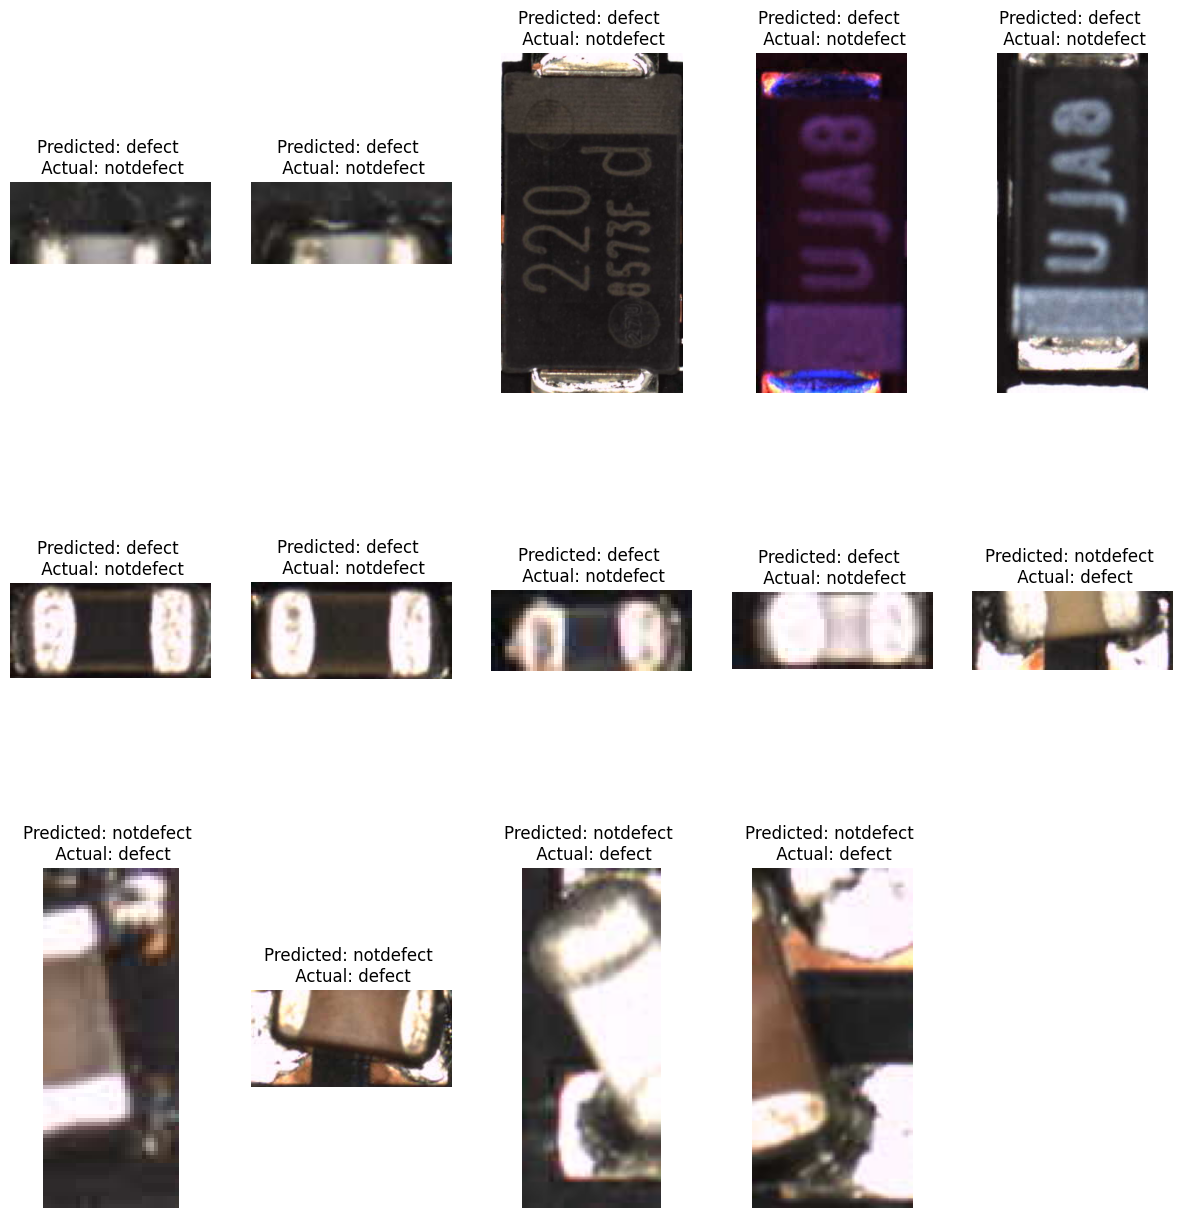

In [50]:
# DO NOT CHANGE THIS CELL
# plot bad predictions
plt.figure(figsize=(15, 15))

errors_df=results_df[results_df['prediction']!=results_df['true_defect']].reset_index(drop=True)

num_cols=5
num_rows=math.ceil(len(errors_df)/num_cols)

for i, row in errors_df.iterrows(): 
    image_path=row['image_path']
    image_path=image_path.replace(os.environ['TAO_DATA_DIR'], os.environ['LOCAL_DATA_DIR'])
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(mpimg.imread(image_path))
    plt.title('Predicted: {} \n Actual: {}'.format(row['prediction'], row['true_defect']))
    plt.axis('off')

<a name='s2-3.4'></a>
### Adjusting the Threshold ###
With imbalanced datasets, the Area Under the Curve (AUC) score calculated from the Receiver Operating Characteristic (ROC) is a very useful metric for identifying the optimum threshold for classification. AUC - ROC curve is a performance measurement for a classification problem at various thresholds settings where ROC is a probability curve and AUC represents degree or measure of separability. The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis. TPR and FPR are defined as follows:
* TPR = True Positives / All Positives
* FPR = False Positives / All negatives

With ROC, we can see the model's performance at various classification thresholds: 
<p><img src='images/ROC_curve.gif' width=1080></p>

In [51]:
# DO NOT CHANGE THIS CELL
def get_single_tpr_fpr(df):
    '''
    calculate true positive rate and false positive rate
    
    param: 
        df: the dataframe should have 'true_defect' and 'prediction' as its labels
    return: 
        a list containing tpr and fpr
    '''
    
    tp=((df['true_defect'] == 'defect' ) & (df['prediction'] == 'defect')).sum()
    fp=((df['true_defect'] == 'notdefect' ) & (df['prediction'] == 'defect')).sum()
    tn=((df['true_defect'] == 'notdefect' ) & (df['prediction'] == 'notdefect')).sum()
    fn=((df['true_defect'] == 'defect' ) & (df['prediction'] == 'notdefect')).sum()

    tpr=tp / (tp + fn )
    fpr=fp / (fp + tn)

    return [tpr, fpr]

In [52]:
# DO NOT CHANGE THIS CELL
# while computing AUC score you need to calculate "TP,"FP" at every threshold by using actual "true_positive" and predicted "prediction".
def calculate_all_thresholds_tpr_fpr_arr(df):
    '''
    calculate true positive rates and false positive rates at various thresholds
    
    param: 
        df: the original dataframe, which should have a 'probability' label
    return: 
        two arrays: tpr_arr_for_all_thresholds, fpr_arr_for_all_thresholds
    '''
    tpr_arr_for_all_thresholds = []
    fpr_arr_for_all_thresholds = []

    sorted_df=df.sort_values(by=['probability'], ascending=False)
    sorted_df.loc[sorted_df['prediction']=='notdefect', 'probability']=1-sorted_df.loc[sorted_df['prediction']=='notdefect', 'probability']

    unique_probability_thresholds = sorted_df['probability'].unique()

    for threshold in unique_probability_thresholds:
        sorted_df['prediction'] = np.where(sorted_df['probability'] >= threshold, 'defect', 'notdefect')
        tpr_fpr_arr = get_single_tpr_fpr(sorted_df)
        tpr_arr_for_all_thresholds.append(tpr_fpr_arr[0])
        fpr_arr_for_all_thresholds.append(tpr_fpr_arr[1])

    return tpr_arr_for_all_thresholds, fpr_arr_for_all_thresholds

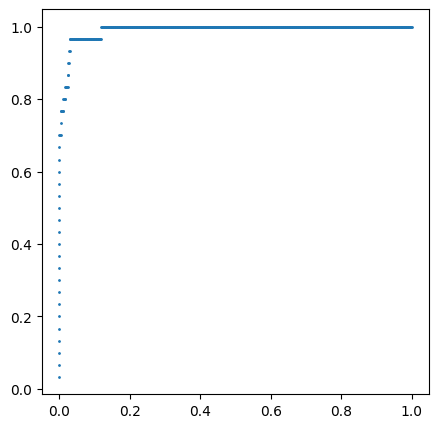

In [53]:
# DO NOT CHANGE THIS CELL
fig=plt.figure(figsize=(5, 5))
all_tpr, all_fpr=calculate_all_thresholds_tpr_fpr_arr(results_df)
plt.scatter(all_fpr, all_tpr, s=1)

array([[<AxesSubplot: title={'center': 'defect'}>,
        <AxesSubplot: title={'center': 'notdefect'}>]], dtype=object)

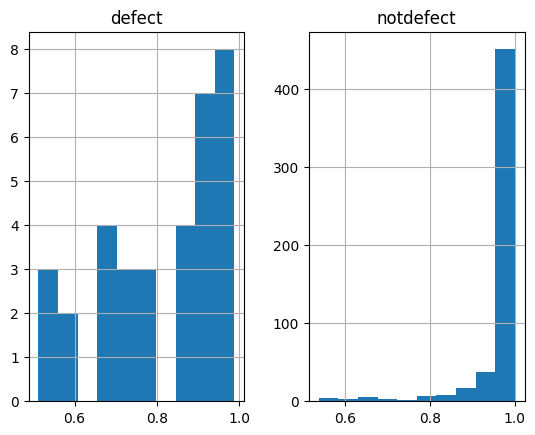

In [54]:
# DO NOT CHANGE THIS CELL
results_df.pivot_table(columns='prediction', index='image_path', values='probability').hist(stacked=True)

**Well Done!** When you're finished, please complete the assessment before moving onto the next lab. 

<a href="https://www.nvidia.com/dli"> <img src="images/DLI_Header.png" alt="Header" style="width: 400px;"/> </a>